<a href="https://colab.research.google.com/github/WongCKB/Miscellaneous/blob/master/20210324_GA_Introduction_to_Data_Science_K_means_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Science - General Assembly (2021-03-23)

Some useful commands for using a Jupyter notebook: 
* Enter to modify the contents of a cell 
* Escape to leave a cell 
* Shift-Enter to run a cell and move to the next one 
* b to insert a cell (when not in a cell) 
* dd to delete a cell (when not in a cell) 
* Put ? in front of a command to see its help (e.g. `?pd.read_csv`)
* Press Tab when writing a command for autocompletion
* Put the cursor inside brackets of a function and press Shift-Tab to have documentation pop up (e.g. `pd.read_csv(place cursor here, press Shift-Tab)` 

## Importing packages and modules

We'll start by importing the packages we'll use. We use the `import` command to do this.  We use `pandas` for data analysis and `matplotlib` for plotting. 

We can give these packages a shorter name to make it easy to refer to them. We'll do that too.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Get the dataset you've created

In [ ]:
X = pd.read_csv('clustering_dataset_20210323_ga.csv')
X.dropna(inplace=True); X.reset_index(drop=True,inplace=True)
X.head(20)

,height,w_exp,f_name
0,175.00,20.00,name 1
1,170.00,7.00,name 2
2,160.00,11.00,name 3
3,165.00,15.00,name 4
4,162.56,8.00,name 5
5,160.00,4.00,name 6
6,170.00,10.00,name 7
7,171.00,0.50,name 8
8,159.00,8.00,name 9
9,155.00,14.00,name 10


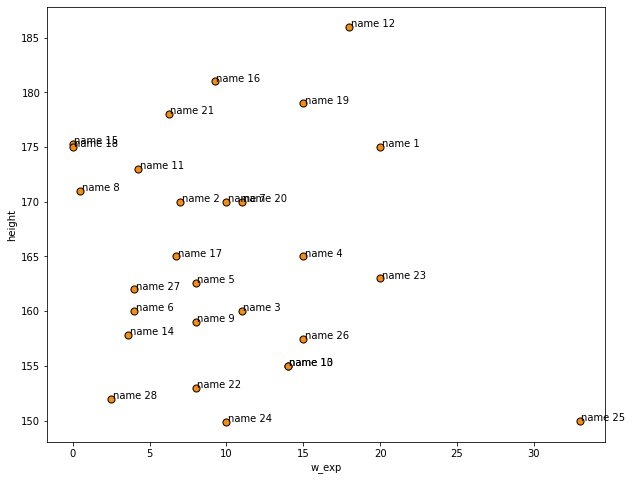

In [ ]:
# plot
plt.figure(figsize=(10,8))
ax = plt.axes(); ax.set(xlabel='w_exp',ylabel='height')
ax.scatter(
   X['w_exp'], X['height'],
   c='darkorange', marker='o',
   edgecolor='black', s=50
)
for x in X.values:
    r = dict(zip(X.columns,x))
    ax.annotate(r['f_name'],(r['w_exp']+0.1,r['height']))
plt.show()

## Pre-processing

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X[['w_exp','height']])
# X_standardised = scaler.transform(X[['w_exp','height']])
# X_standardised = pd.DataFrame(X_standardised,columns=['scaled_w_exp','scaled_height'])
# X_standardised.head(10)

## Let's run K-means clustering using scikit-learn

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
X['cluster'] = km.fit_predict(X[['w_exp','height']])
# X['cluster'] = km.fit_predict(X_standardised)
X.head(5)

,height,w_exp,f_name,cluster
0,175.00,20.0,name 1,0
1,170.00,7.0,name 2,0
2,160.00,11.0,name 3,2
3,165.00,15.0,name 4,2
4,162.56,8.0,name 5,2


## Now plot the clusters

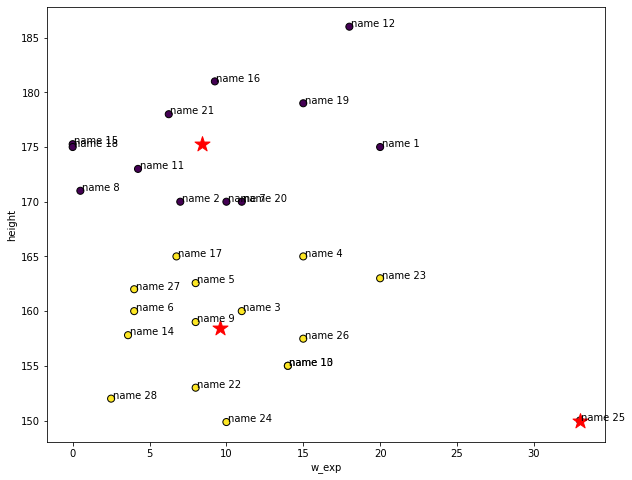

In [ ]:
# plot
plt.figure(figsize=(10,8))
ax = plt.axes(); ax.set(xlabel='w_exp',ylabel='height')
# centroids = scaler.inverse_transform(km.cluster_centers_)
centroids = km.cluster_centers_
ax.scatter(
   X['w_exp'], X['height'],
   c=X['cluster'], marker='o',
   edgecolor='black', s=50
)
for x in X.values:
    r = dict(zip(X.columns,x))
    ax.annotate(r['f_name'],(r['w_exp']+0.1,r['height']))
    
_ = ax.scatter(centroids[:,0],centroids[:,1],s=250,marker="*",c="red")

plt.show()

In [ ]:
FIN!

SyntaxError: ignored